# Question

You are given the famous Iris dataset (iris.csv), which contains samples of iris flowers, each described by four features: sepal length, sepal width, petal length, and petal width. The dataset is labeled with three classes: Setosa, Versicolor, and Virginica.  
**a.First take 2 dimensions/features, that is, Sepal Length and Sepal Width.**    
Your task is to implement a classification algorithm using the Euclidean distance metric to predict the class of a given iris sample.   
1.Load the Iris dataset and split it into a training set and a testing set. The testing set should contain the first 3 samples of each class.  
Do NOT use the inbuilt function for splitting the data.  
2.Plot all the training samples and write the inferences.   
3.For each sample in the testing set, compute its Euclidean distance to all samples in the training set.   
4.Identify the K-nearest neighbors with the smallest Euclidean distances for each sample in the testing set, where K is a hyperparameter  
5.Determine the majority class among the K-nearest neighbors and assign it as the predicted class for the sample.  
6.Evaluate the accuracy of your classifier on the testing set and report the results.  
**Repeat the same for all the four dimensions and skip plotting the data.**  
Your Python code should include functions to calculate Euclidean distance, perform classification, and compute accuracy.  
Also, experiment with different values of K to find the optimal performance.

## Importing Librabries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## New Functions

In [28]:
def euclidean_distance(X_train, X_test):
    all_point_distances = []
    for i in X_test:
        point_distance = []
        for j in X_train:
            dist = np.sqrt(np.sum((j-i)**2))
            # dist = math.sqrt((j[0] - i[0])**2 + (j[1] - i[1])**2)
            point_distance.append(dist)
        all_point_distances.append(point_distance)
    arr = np.array(all_point_distances)
    return arr

In [29]:
def knn_classify(distance_array, y_train, k):
    array_indexes = []
    for point in distance_array:
        nearest_points = np.argsort(point)[:k]
        array_indexes.append(nearest_points)
    array_indexes = np.array(array_indexes)

    y_values = []
    for point in array_indexes:
        values = []
        for i in point:
            values.append(y_train[i])
        y_values.append(values)
    y_pred = []
    for point in y_values:
        y_pred.append(max(point, key=point.count))
    y_pred = np.array(y_pred)

    return y_pred

In [30]:
def check_accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test)/len(y_test)

In [31]:
def accuracy_vs_k(eud, y_train, y_test, k_range):
    accuracy_list = []
    for k in k_range:
        y_pred = knn_classify(eud, y_train, k)
        accuracy_list.append(check_accuracy(y_pred, y_test))
    return accuracy_list

# Part-A

## Pre-Processing

Importing the dataset

In [32]:
dataset = pd.read_csv('iris.csv')
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [33]:
X = dataset.iloc[:, 1:3].values
y = dataset.iloc[:, -1].values

In [34]:
print(X)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.1]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

In [35]:
print(y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

Encoding the Dependent Variable

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [37]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Test-Train Splitting

In [38]:
setosa_data = dataset.loc[dataset["Species"] == "Iris-setosa"]
versicolor_data = dataset.loc[dataset["Species"] == "Iris-versicolor"]
virginica_data = dataset.loc[dataset["Species"] == "Iris-virginica"]

In [39]:
X_setosa = setosa_data.iloc[:, 1:3].values
y_setosa = setosa_data.iloc[:, -1].values
X_versicolor = versicolor_data.iloc[:, 1:3].values
y_versicolor = versicolor_data.iloc[:, -1].values
X_virginica = virginica_data.iloc[:, 1:3].values
y_virginica = virginica_data.iloc[:, -1].values

In [40]:
X_test = np.concatenate((X_setosa[:3], X_versicolor[:3], X_virginica[:3]), axis = 0)
X_train = np.concatenate((X_setosa[3:], X_versicolor[3:], X_virginica[3:]), axis = 0)
y_test = np.concatenate((y_setosa[:3], y_versicolor[:3], y_virginica[:3]), axis = None)
y_train = np.concatenate((y_setosa[3:], y_versicolor[3:], y_virginica[3:]), axis = None)

In [41]:
y_test = le.fit_transform(y_test)
y_train = le.fit_transform(y_train)

Plotting the graphs

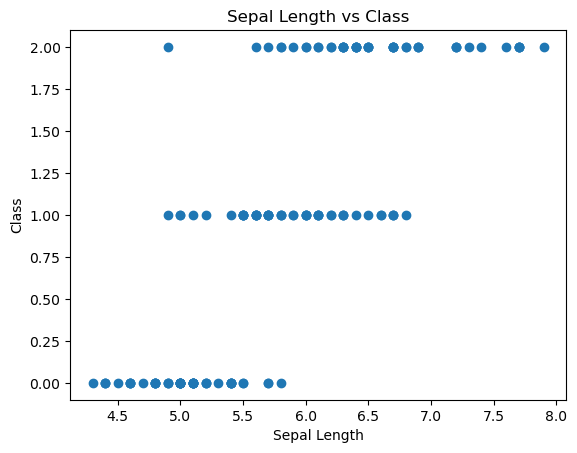

In [42]:
plt.scatter(X_train[:, 0:1], y_train)
plt.title("Sepal Length vs Class")
plt.xlabel("Sepal Length")
plt.ylabel("Class")
plt.show()

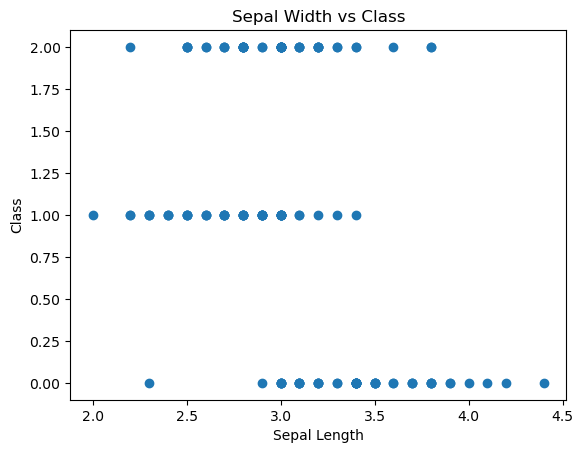

In [43]:
plt.scatter(X_train[:, 1], y_train)
plt.title("Sepal Width vs Class")
plt.xlabel("Sepal Length")
plt.ylabel("Class")
plt.show()

## Applying KNN

In [44]:
eud = euclidean_distance(X_train, X_test)
k = 5
y_pred = knn_classify(eud, y_train, k)
print(f"Actual Output: {y_test}\nPredicted Output: {y_pred}")

Actual Output: [0 0 0 1 1 1 2 2 2]
Predicted Output: [0 0 0 2 2 2 2 1 2]


## Performance

In [45]:
print(f"Accuracy with k={k} : {check_accuracy(y_pred, y_test)*100}%")

Accuracy with k=5 : 55.55555555555556%


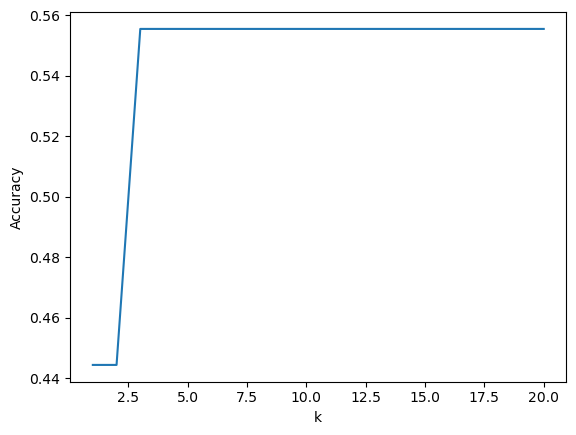

In [46]:
k_range = range(1, 21)
accuracy_list_a = accuracy_vs_k(eud, y_train, y_test, k_range)
plt.plot(k_range, accuracy_list_a)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

# Part-B

In [47]:
X_setosa_b = setosa_data.iloc[:, 1:-1].values
y_setosa_b = setosa_data.iloc[:, -1].values
X_versicolor_b = versicolor_data.iloc[:, 1:-1].values
y_versicolor_b = versicolor_data.iloc[:, -1].values
X_virginica_b = virginica_data.iloc[:, 1:-1].values
y_virginica_b = virginica_data.iloc[:, -1].values

In [48]:
X_test_b = np.concatenate((X_setosa[:3], X_versicolor[:3], X_virginica[:3]), axis = 0)
X_train_b = np.concatenate((X_setosa[3:], X_versicolor[3:], X_virginica[3:]), axis = 0)
y_test_b = np.concatenate((y_setosa[:3], y_versicolor[:3], y_virginica[:3]), axis = None)
y_train_b = np.concatenate((y_setosa[3:], y_versicolor[3:], y_virginica[3:]), axis = None)

In [49]:
y_test_b = le.fit_transform(y_test_b)
y_train_b = le.fit_transform(y_train_b)

In [50]:
eud_b = euclidean_distance(X_train_b, X_test_b)
k = 5
y_pred_b = knn_classify(eud_b, y_train_b, k)
print(f"Actual Output: {y_test_b}\nPredicted Output: {y_pred_b}")

Actual Output: [0 0 0 1 1 1 2 2 2]
Predicted Output: [0 0 0 2 2 2 2 1 2]


In [51]:
print(f"Accuracy with k={k} : {check_accuracy(y_pred_b, y_test_b)*100}%")

Accuracy with k=5 : 55.55555555555556%


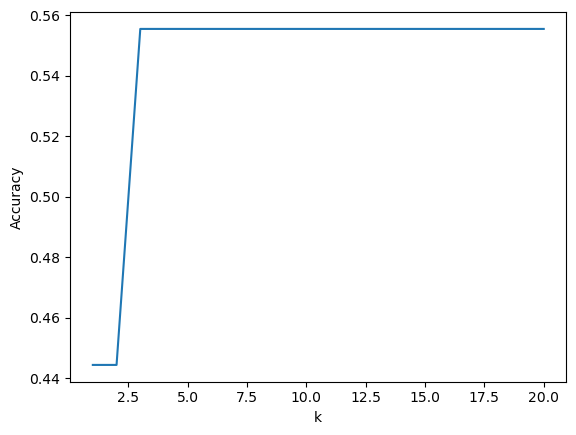

In [52]:
k_range = range(1, 21)
accuracy_list_b = accuracy_vs_k(eud_b, y_train_b, y_test_b, k_range)
plt.plot(k_range, accuracy_list_b)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()